# <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#B03060"> Vamsi Pasala - Personal Loan Campagin

## Description


## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

## Data Description

**Data Dictionary**

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

# 1. Loading libraries

### Import required libraries for the project.

In [764]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black

# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# To build model for prediction

from sklearn.linear_model import LogisticRegression


# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    roc_auc_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_curve,
    precision_recall_curve
)

### Load data

In [765]:
lmdata = pd.read_csv("Loan_Modelling.csv") # Loaded data in to Pandas Dataframes

### Copy loaded data to new variable

In [766]:
data = lmdata.copy() # Copy data in to new variable data

### View the first and last 5 rows of the dataset.

In [767]:
data.head() # verify the first five rows in the data frame

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [768]:
data.tail()  # verify the last five rows in the data frame

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### View the first 10 rows of the dataset by Sorting by Age.

In [769]:
data.head(10).sort_values(['Age'], ascending=True) # Verifying the data by sorting by age

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
9  10   34           9     180    93023       1    8.9          3         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   
8   9   35          10      81    90089       3    0.6          2       104   
5   6   37          13      29    92121       4    0.4          2       155   
2   3   39          15      11    94720       1    1.0          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
7   8   50          24      22    93943       1    0.3          3         0   
6   7   53          27      72    91711       2    1.5          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
9              1                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
8              0                   0           0       1           0  
5              0                   0           0       1           0  
2              0                   0           0       0           0  
1              0                   1           0       0           0  
7              0                   0           0       0           1  
6              0                   0           0       1           0

In [770]:
data.info() # verifying the variables and data types in the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


* We see that names of the columns are in good format and no change required for the column name and can be used
* Dependent variable is the Personal_Loan which is of categorical type
* Age, Education, Family, Experience, Personal_Loan, Securities_Account, CD_Account, Online and CreditCard are of integer datatype
* There are no missing values in the dataset.

In [644]:
x = data.shape  # verify the shape of the data and print to it.
print(f"Number of rows {x[0]} and columns {x[1]} in in data set")

Number of rows 5000 and columns 14 in in data set


In [645]:
data.isnull().sum() # check if any rows has null values

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no missing values in the dataset.

In [646]:
print(data.columns)

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


### Summary of the dataset.

In [647]:
data.describe().T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

* `age`: Average age of people in the dataset is 45 years, age has a wide range from 23 to 67 years.
* `Experience`: The average education in years is 20 years. Observed some negative values requires some data clean up and max experience noticed is 43 years.
* `Income`: The average Income in the data set is $73,000 There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers.
* `Family`: The average family size is 2 and maximum family size is 4, There is no outlier as the data is evenly distributed.
* `CCAvg`: The averge Credit card balance is 1.9 thousands . A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `Education`: On average education is 1.8. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `Mortgage`: On average mortgage value of the customer is 56 thousand. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `Personal_Loan`: This is a categorical variable with encoding values 0 as no and 1 as yes.
* `Securities_Account`:This is a categorical variable with encoding values 0 as no and 1 as yes.
* `CD_Account`: This is a categorical variable with encoding values 0 as no and 1 as yes.
* `Online`: This is a categorical variable with encoding values 0 as no and 1 as yes.
* `CreditCard`: This is a categorical variable with encoding values 0 as no and 1 as yes.

In [648]:
# printing the number of occurrences of each unique value in each categorical column
cat_columns = ['Education','Family', 'Experience','Securities_Account','CD_Account','Online','CreditCard']
for column in cat_columns:
    print(data[column].value_counts())
    print("-" * 50)

1    2096
3    1501
2    1403
Name: Education, dtype: int64
--------------------------------------------------
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
--------------------------------------------------
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 22    124
 29    124
 7     121
 15    119
 8     119
 6     119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 4     113
 21    113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64
--------------------------------------------------
0    4478
1     522
Name: Securities_Account, dtype: int64
--------------------------------------------------
0    4698
1     302
Name: CD_Account, dtype: int64
-----------

* Noticed some negative values in the experience feature
* Education feature values are distributed evenly
* Family feature values are distributed evenly

### Data Imputation
#### Converting values from 1 to 1000 as features 'Income','CCAvg','Mortgage'  single values

In [649]:
def convert_thousands_dollars(value):
    """This function converts value and thousands of dollars
     ex: 1 to 1000 and 2 to 2000
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan."""
    if value > 0:# checks if value is greater than
        multiplier = 1000  # Multiply value with 1000
        value  = value * multiplier
        return value
    else:
        value = 0
        return value
    
money_cols = ['Income','CCAvg','Mortgage']
for colname in money_cols:
    data[colname] = data[colname].apply(convert_thousands_dollars)
    
data[money_cols].head(10)  # good to go!

Income   CCAvg  Mortgage
0   49000  1600.0         0
1   34000  1500.0         0
2   11000  1000.0         0
3  100000  2700.0         0
4   45000  1000.0         0
5   29000   400.0    155000
6   72000  1500.0         0
7   22000   300.0         0
8   81000   600.0    104000
9  180000  8900.0         0

* Data converted to thousands

### Univariate Analysis

In [650]:
# function to plot a boxplot and a histogram along the same scale.


def my_histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

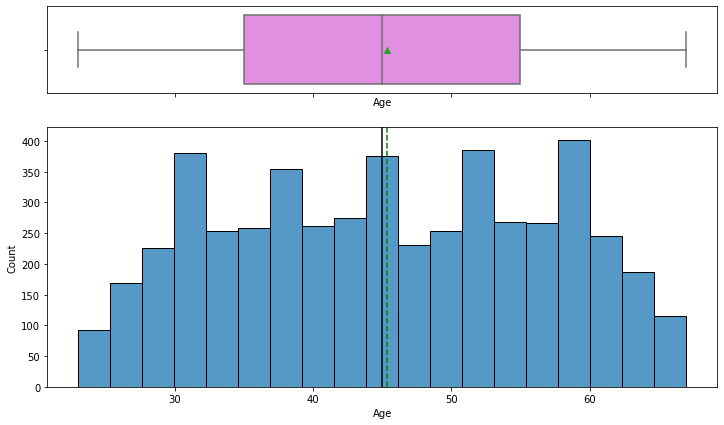

In [651]:
my_histogram_boxplot(data,"Age")

* `Age`: Average age of people in the dataset is 45 years, age has a wide range from 23 to 67 years.
* Data evenly disributed and not much outliers


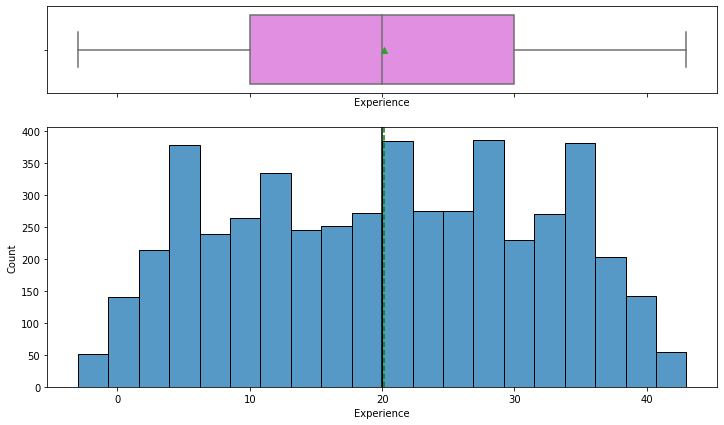

In [652]:
my_histogram_boxplot(data,"Experience")

* `Experience`: The average education in years is 20 years. Observed some negative values requires some data clean up and max experience noticed is 43 years.
* Data is evenly distributed and no outliers noticed
* Values below zero are noticed

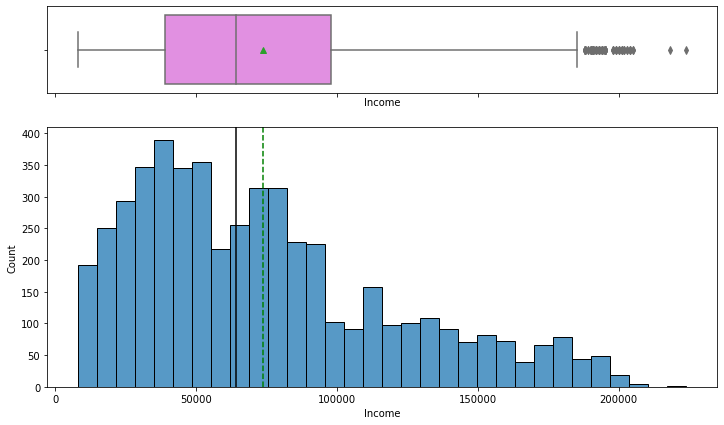

In [653]:
my_histogram_boxplot(data,"Income")

* `Income`: The average Income in the data set is $73,000 There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers.
* Outliers are noticed in the data and outlier treatment is needed
* Data is right skewed

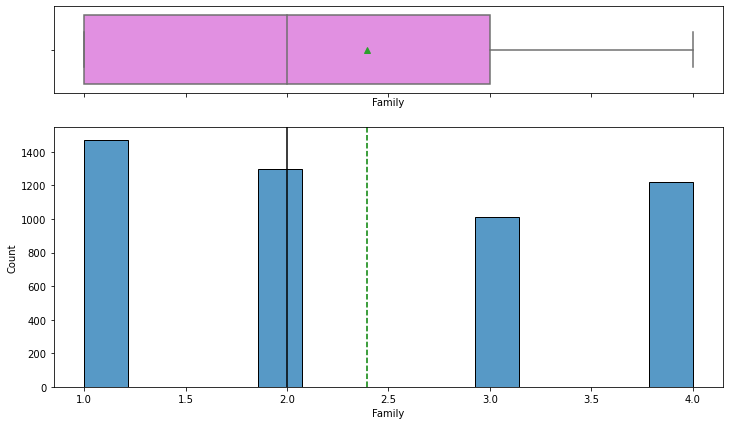

In [654]:
my_histogram_boxplot(data,"Family")

* `Family`: The average family size is 2 and maximum family size is 4, There is no outlier as the data is evenly distributed.
* Not outliers are noticed and data is evenly distributed

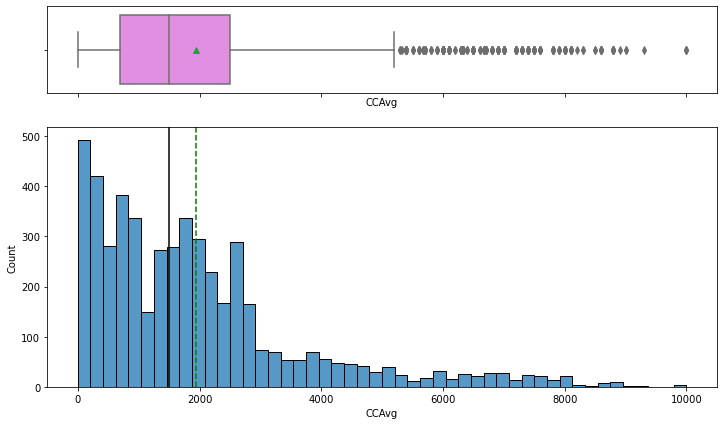

In [655]:
my_histogram_boxplot(data,"CCAvg")

* `CCAvg`: The averge Credit card balance is 1.9 thousands . A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* Data is right skewed and lot of outliers noticed
* Outlier treatment is needed


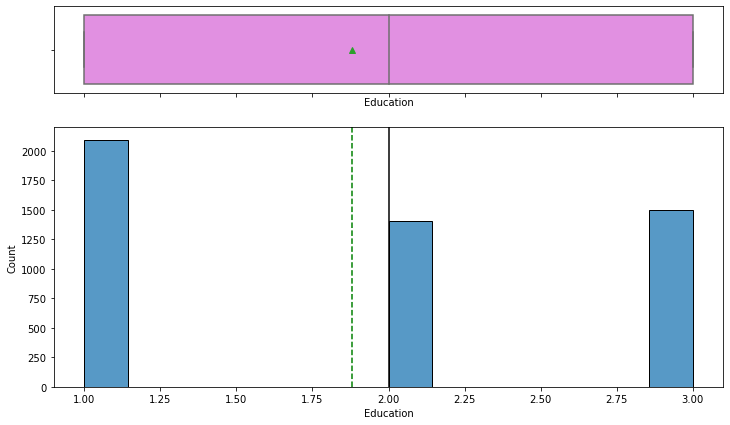

In [656]:
my_histogram_boxplot(data,"Education")

* `Education`: On average education is 1.8. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* No outliers are identified and data is distributed evenly


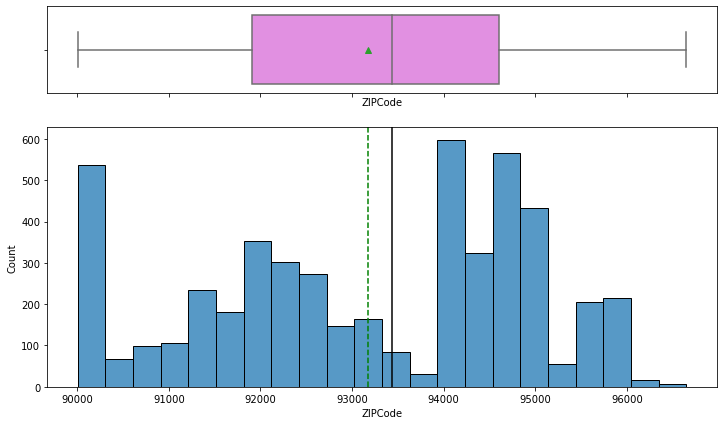

In [657]:
my_histogram_boxplot(data,"ZIPCode")

* `Zipcode`: Zip code data is distrubuted evenly

In [658]:
def my_labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

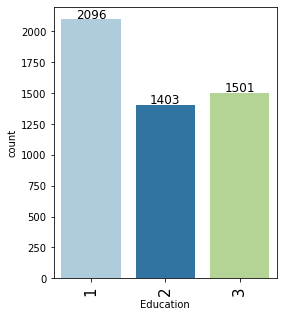

In [659]:
my_labeled_barplot(data,"Education")

* Customers with Undergrand is highesh and count of customers having undergrand is 2096, followed by Advanced and Professional degree with a count of 1501 and Graduate degree with count of 1403

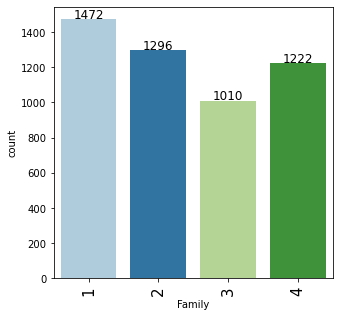

In [660]:
my_labeled_barplot(data,"Family")

* Customers are distrubuted with different family sizes and most of the customers are having family 1 an followed by family of 2

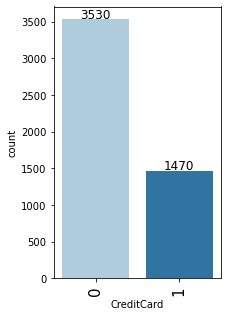

In [661]:
my_labeled_barplot(data,"CreditCard")

* Most of the customers don't use creduit card issued by another bank and it is not clear if they use credit card at all

### Bivariate analysis

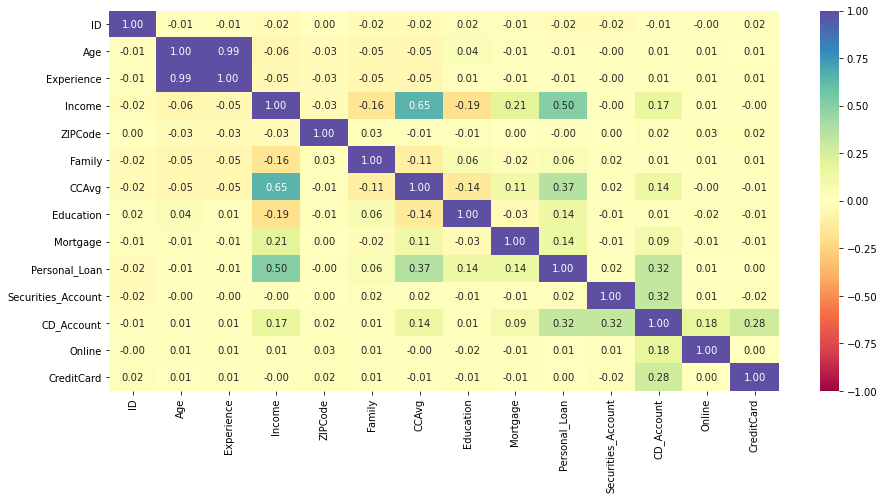

In [662]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show() # plotting in the heat map of the correlated data

* Age and Experience is highly correlated and this can change the outcome of the model
* CCVG feature is some what correlated with income but I don't this will impact the model outcome
* Income and Personal_Loan is also some what correlated

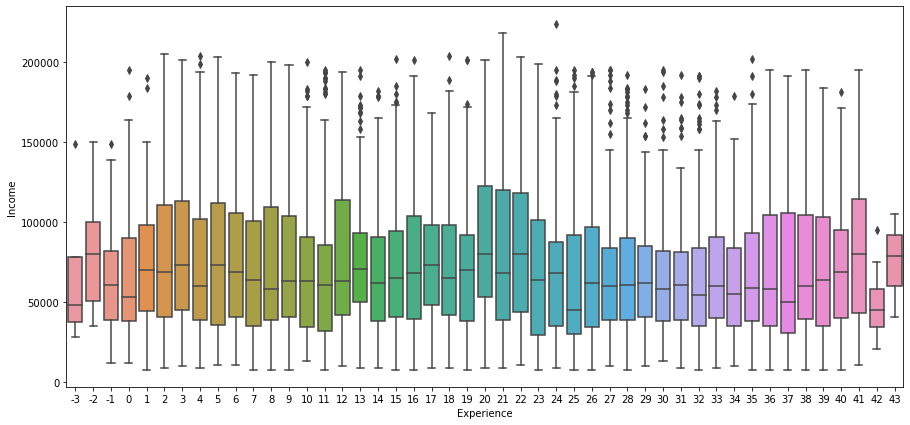

In [663]:
plt.figure(figsize=(15,7)) # To resize the plot
# Visualizing data set using the barplot by gender and usage by grouping with product
#The box shows the quartiles of the dataset while the whiskers
#extend to show the rest of the distribution, except for points that are determined to be “outliers” 
#using a method that is a function of the inter-quartile range
sns.boxplot(x='Experience', y='Income', data=data)
plt.show()

* Customers with different level of experience has different income levels
* There are some outliers of income noticed at different experience levels
* There is some income observed at negative years of experience 

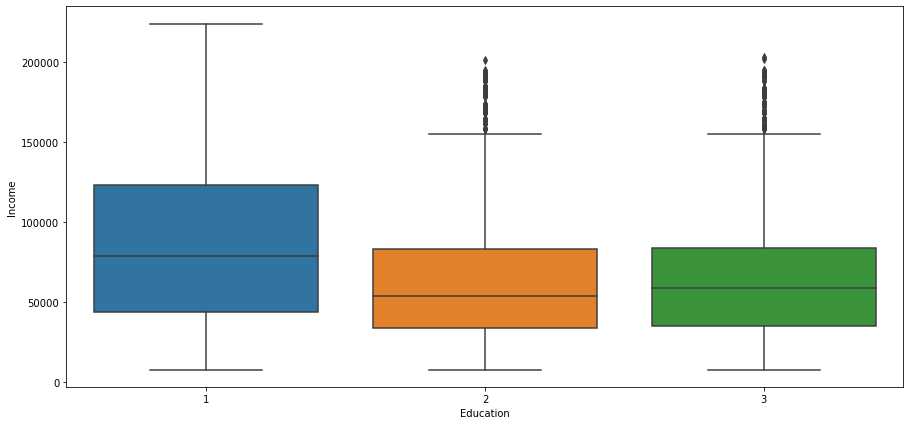

In [664]:
plt.figure(figsize=(15,7)) # To resize the plot
# Visualizing data set using the barplot by gender and usage by grouping with product
#The box shows the quartiles of the dataset while the whiskers
#extend to show the rest of the distribution, except for points that are determined to be “outliers” 
#using a method that is a function of the inter-quartile range
sns.boxplot(x='Education', y='Income', data=data)
plt.show()

* Customers with Undergrand degree has highesh income level
* Customers with Graduate and Advanced degree has different levels of Income
* Outliers are of income is noticed at Education level graduate and advanced degree

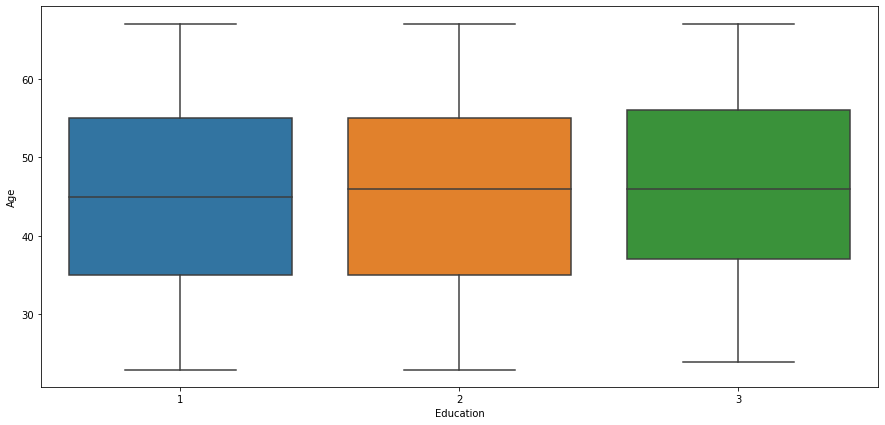

In [665]:
plt.figure(figsize=(15,7)) # To resize the plot
# Visualizing data set using the barplot by gender and usage by grouping with product
#The box shows the quartiles of the dataset while the whiskers
#extend to show the rest of the distribution, except for points that are determined to be “outliers” 
#using a method that is a function of the inter-quartile range
sns.boxplot(x='Education', y='Age', data=data)
plt.show()

* Customers with different age groups are in different education levels
* Data is evenly distributed and it is hard to distinguish that specific age group is having a specific education background

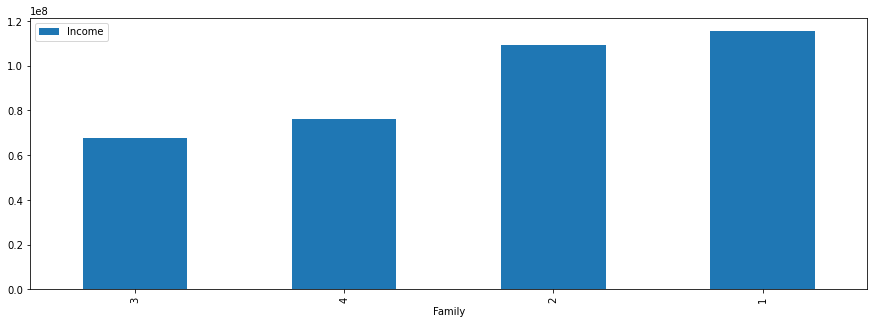

In [666]:
# Show the bar chart by grouping Product and usage 
data.groupby(by=['Family'])['Income'].sum().reset_index().sort_values(['Income']).plot(x='Family',
                                                                                                           y='Income',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

* Family with one has highesh income levels followed by 2

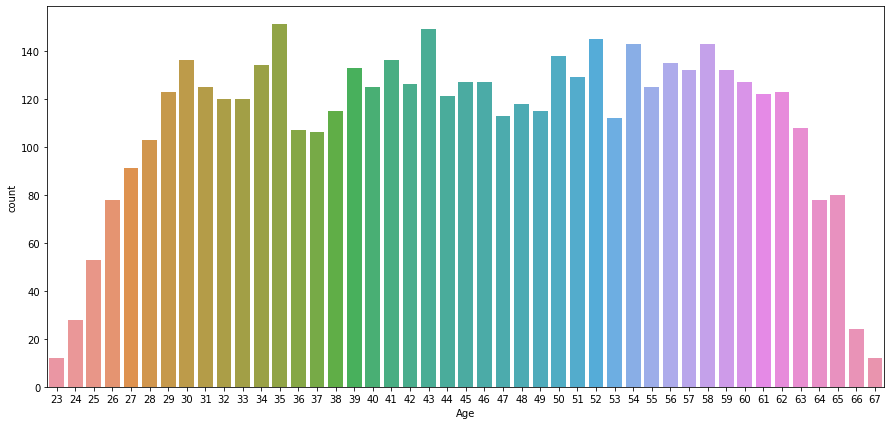

In [667]:
plt.figure(figsize=(15,7)) # To resize the plot
# Plot which popular is more popular among customers
sns.countplot(x='Age', data=data)
plt.show()

* Customer with age group 35 is the highest customer based, followed by age group by 44

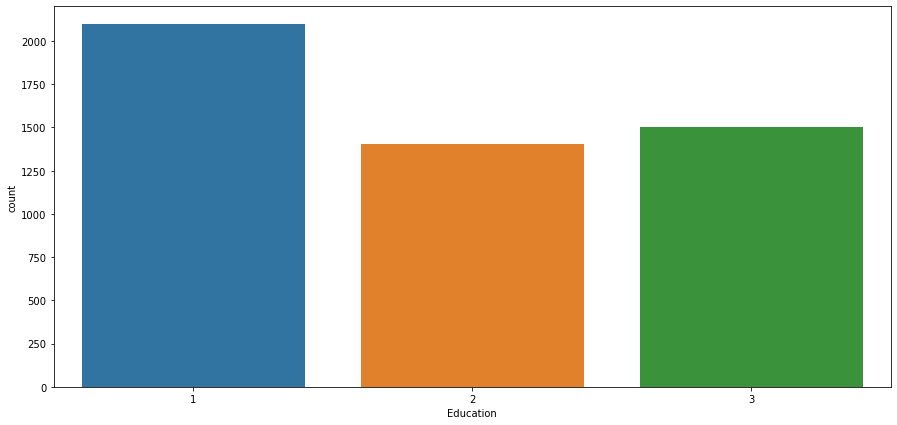

In [668]:
plt.figure(figsize=(15,7)) # To resize the plot
# Plot which popular is more popular among customers
sns.countplot(x='Education', data=data)
plt.show()

* Highest number of customers having Undergraduate degree in the customer pool

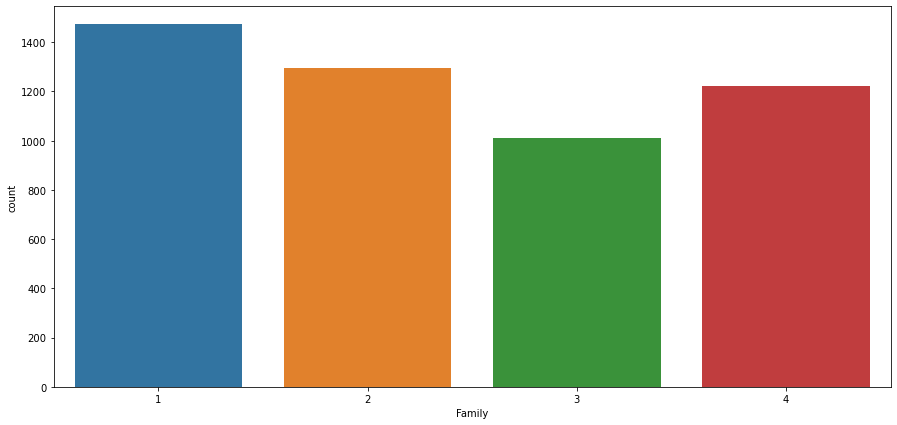

In [669]:
plt.figure(figsize=(15,7)) # To resize the plot
# Plot which popular is more popular among customers
sns.countplot(x='Family', data=data)
plt.show()

* Majority of the customer has 1 family number followed by 2

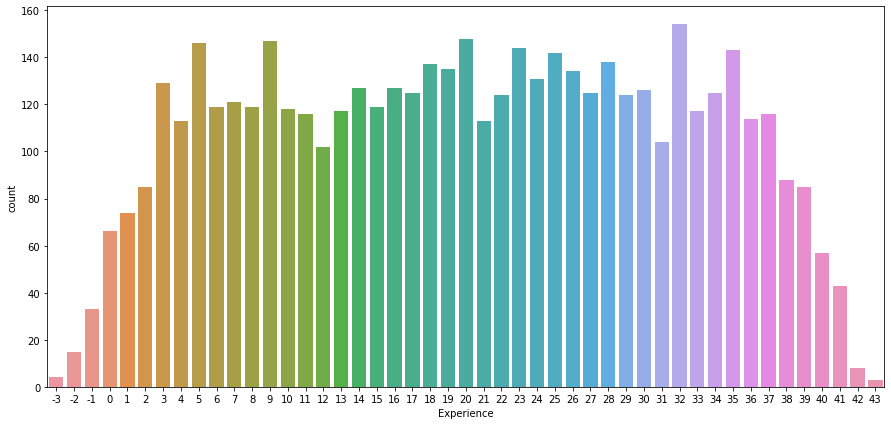

In [670]:
plt.figure(figsize=(15,7)) # To resize the plot
# Plot which popular is more popular among customers
sns.countplot(x='Experience', data=data)
plt.show()

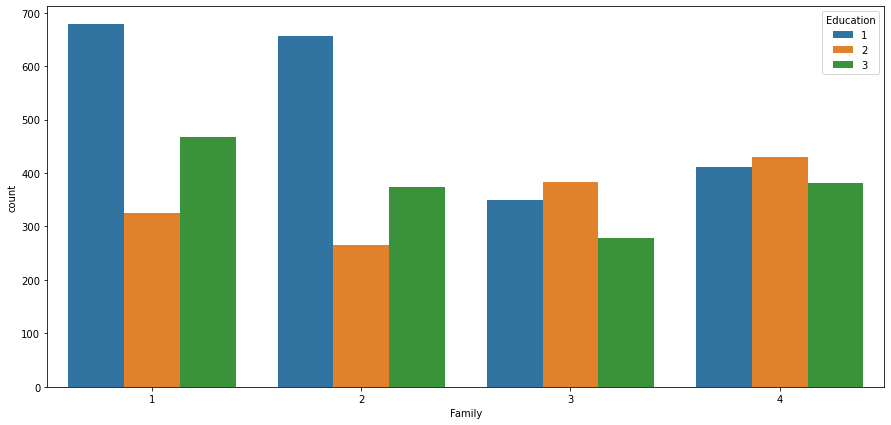

In [671]:
plt.figure(figsize=(15,7)) # To resize the plot
# Plot which popular is more popular among customers
sns.countplot(x='Family', data=data, hue="Education")
plt.show()

* Customer has family with 1 with highest degree as Undergraduate
* Customer has Family with 2 with highest degree as Undergraduate

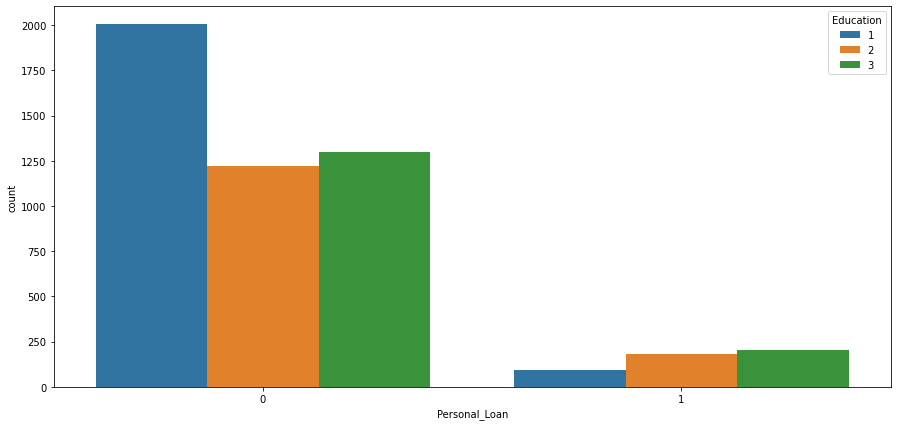

In [672]:
plt.figure(figsize=(15,7)) # To resize the plot
# Plot which popular is more popular among customers
sns.countplot(x='Personal_Loan', data=data, hue="Education")
plt.show()

* Majority of the customers dont have persoanl loan
* Customer with Personal loan has advanced degree

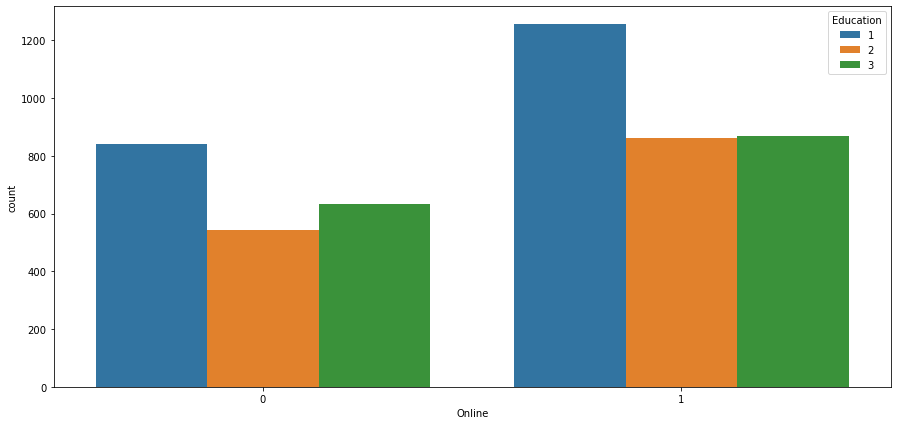

In [673]:
plt.figure(figsize=(15,7)) # To resize the plot
# Plot which popular is more popular among customers
sns.countplot(x='Online', data=data, hue="Education")
plt.show()

* Majority of the cusotmer has oneline account and who are having the online account is with undergraduate degree

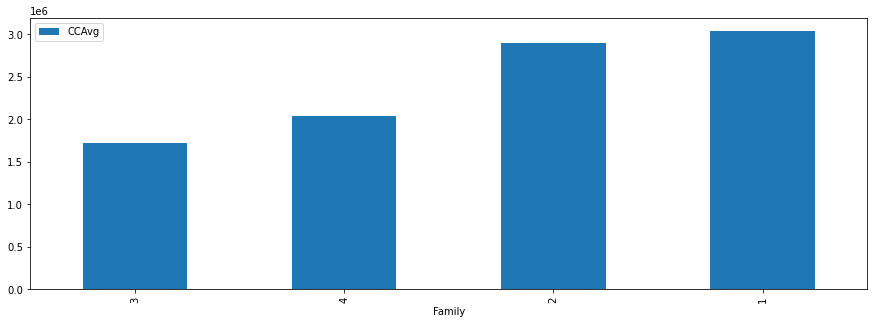

In [674]:
# Show the bar chart by grouping Product and usage 
data.groupby(by=['Family'])['CCAvg'].sum().reset_index().sort_values(['CCAvg']).plot(x='Family',
                                                                                                           y='CCAvg',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

* Customer with one family size 1 has the highest credit card balance

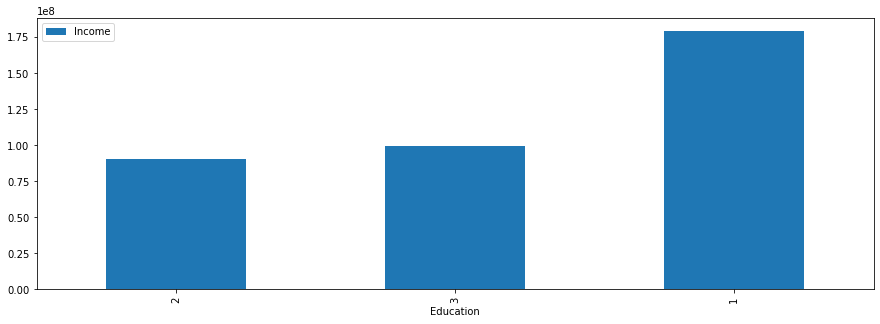

In [675]:
# Show the bar chart by grouping Product and usage 
data.groupby(by=['Education'])['Income'].sum().reset_index().sort_values(['Income']).plot(x='Education',
                                                                                                           y='Income',
                                                                                                           kind='bar',
                                                                                                           figsize=(15,5))
plt.show()

* Customer with Undergraduate level education has the highest income level

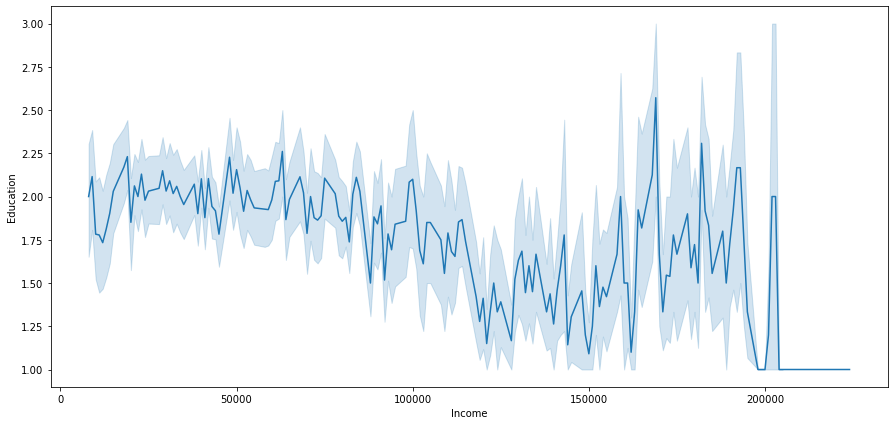

In [676]:
plt.figure(figsize=(15,7)) # To resize the plot
# Plot which popular is more popular among customers
sns.lineplot(x="Income", y="Education", data=data)
plt.show()

* Customers income levels are distributed
* Majority of customers are having income between 150k and 200k

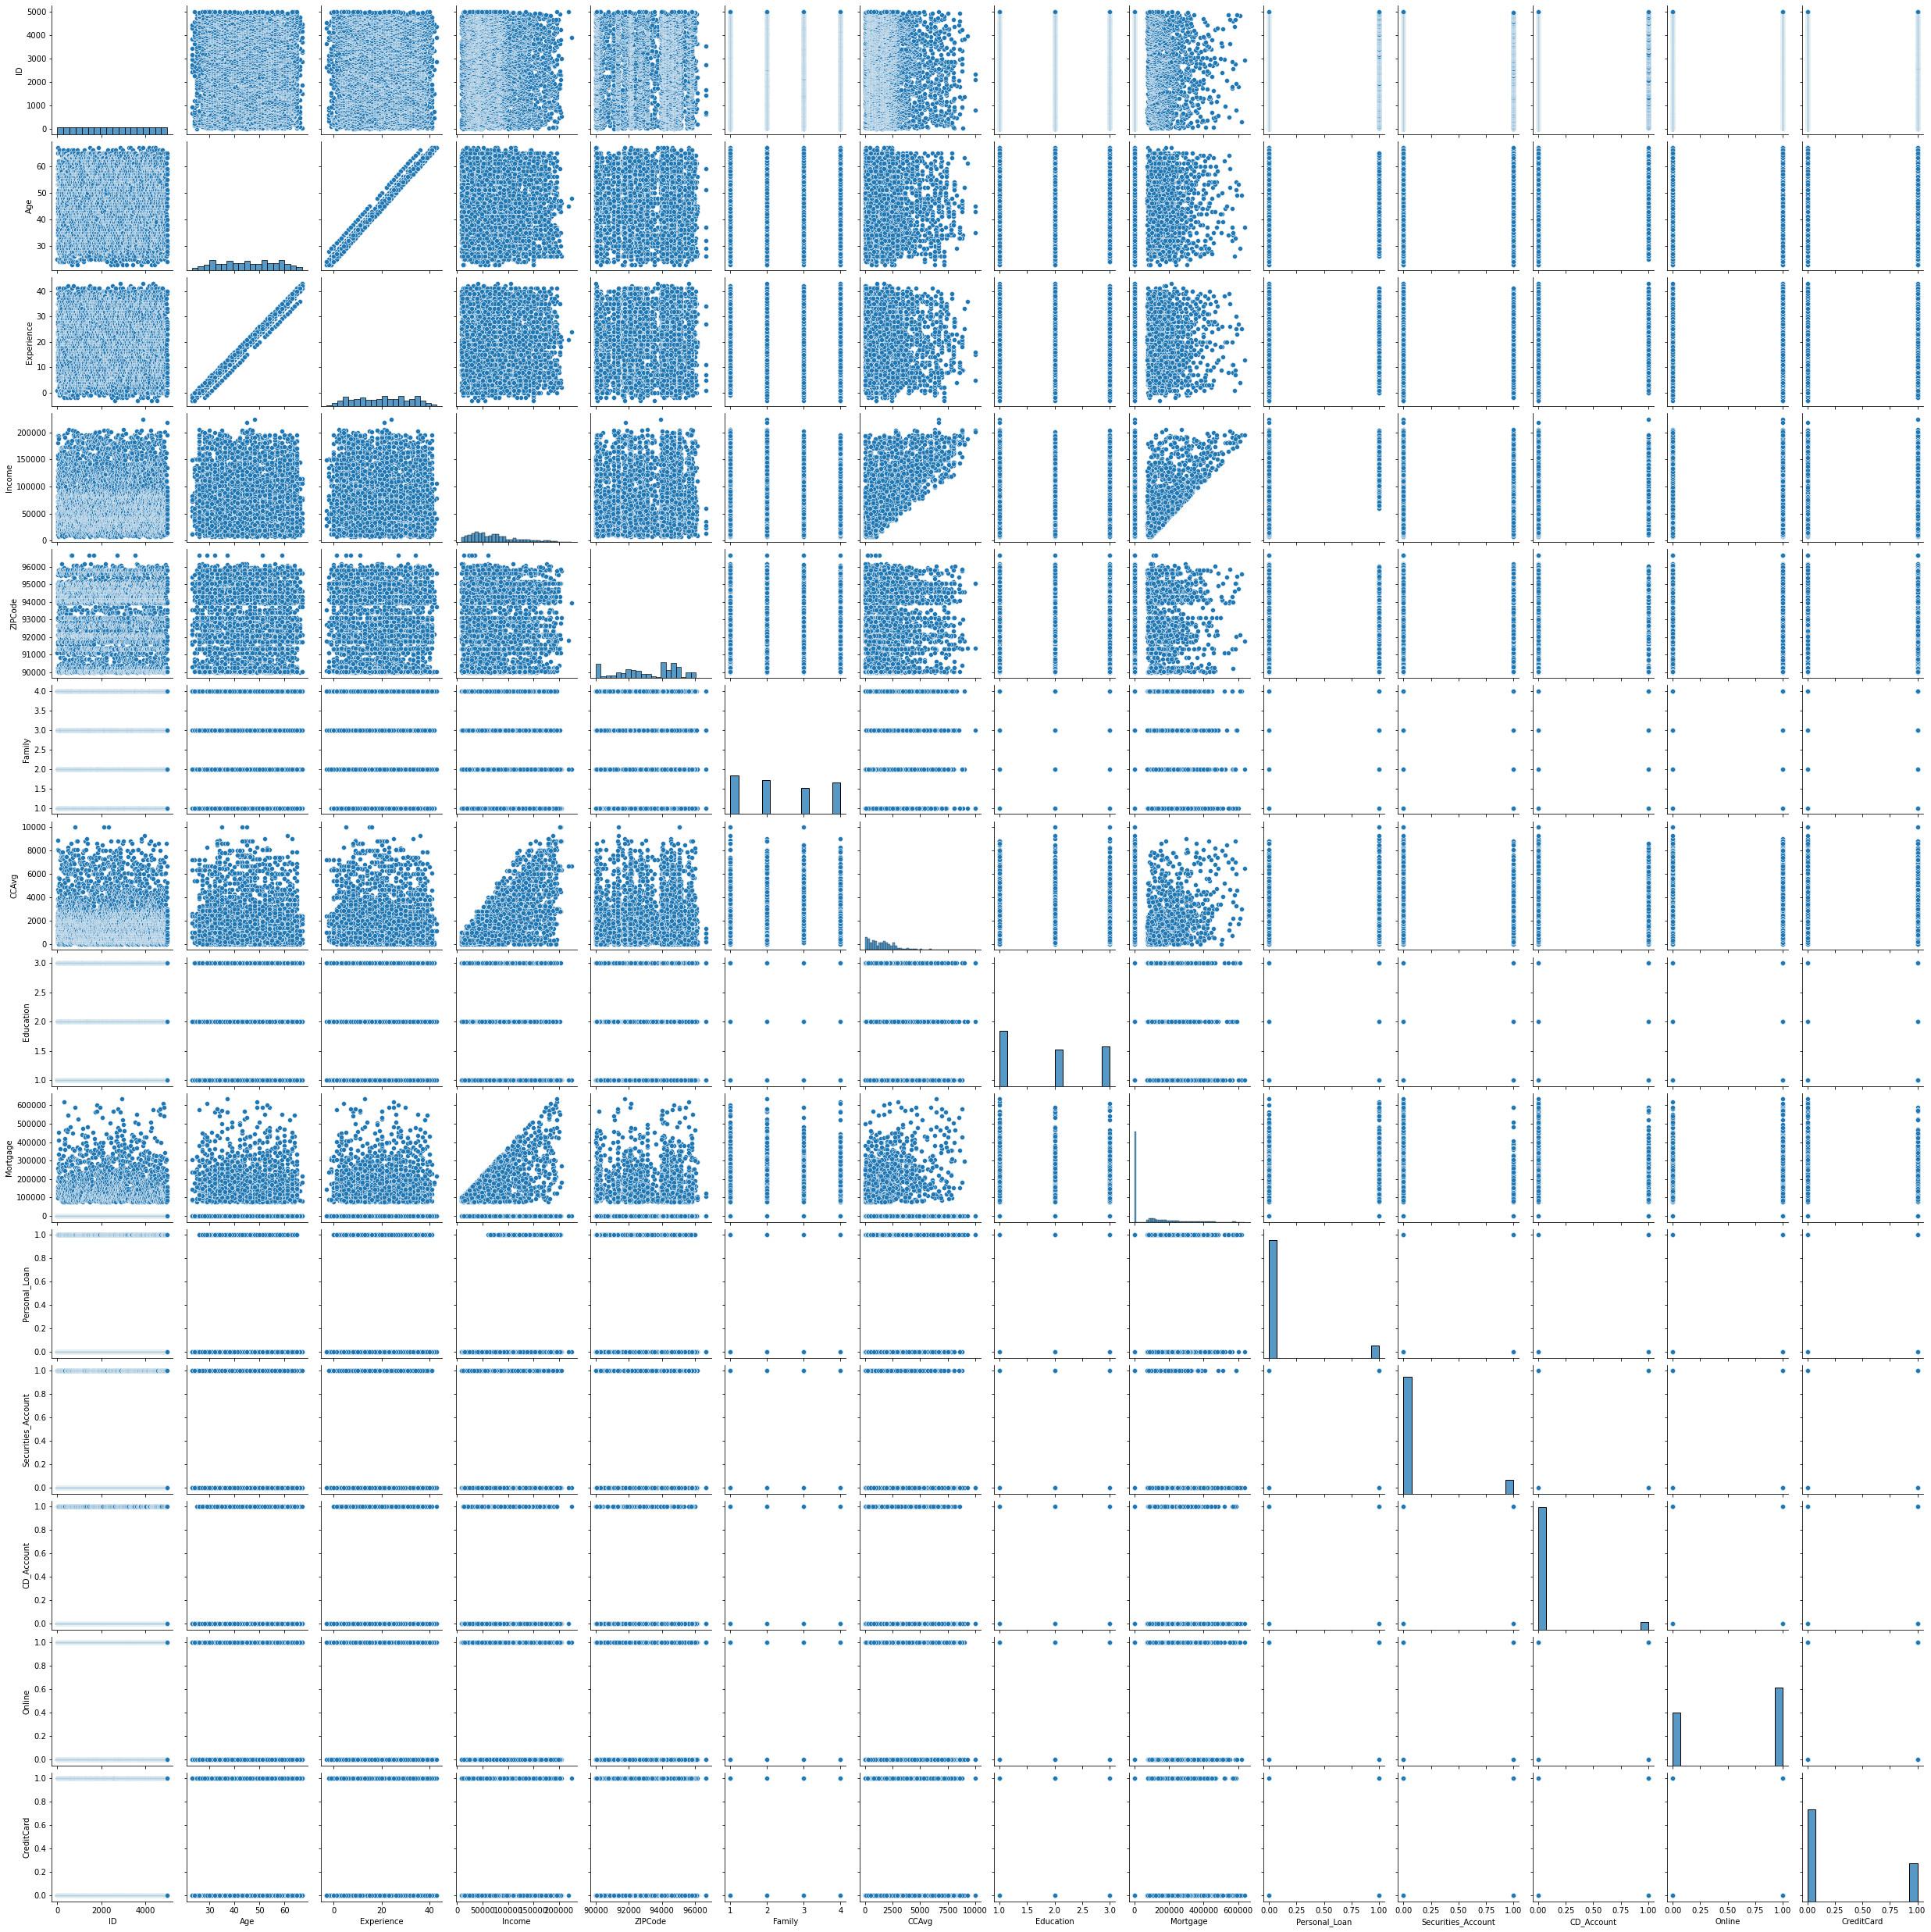

In [677]:
sns.pairplot(data)

* Pair plot is not giving much information as too many correlations

### <a id='link1'>Summary of EDA</a>
**Data Description:**
    
* Dependent variable is the Personal_Loan.
* There are no missing values in the dataset.    

**Data Cleaning:**

* We observed that all the observations are of data type integer or float
* There is no major data cleaning and it is well cured data
* Income, Mortgage, CCAvg are the thousands of Dollar, muliplied the value to the 1000 format

**Observations from EDA:**

* `age`: Average age of people in the dataset is 45 years, age has a wide range from 23 to 67 years.
* `Experience`: The average education in years is 20 years. Observed some negative values requires some data clean up and max experience noticed is 43 years.
* `Income`: The average Income in the data set is $73,000 There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers.
* `Family`: The average family size is 2 and maximum family size is 4, There is no outlier as the data is evenly distributed.
* `CCAvg`: The averge Credit card balance is 1.9 thousands . A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `Education`: On average education is 1.8. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `Mortgage`: On average mortgage value of the customer is 56 thousand. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `Personal_Loan`: This is a categorical variable with encoding values 0 as no and 1 as yes.
* `Securities_Account`:This is a categorical variable with encoding values 0 as no and 1 as yes.
* `CD_Account`: This is a categorical variable with encoding values 0 as no and 1 as yes.
* `Online`: This is a categorical variable with encoding values 0 as no and 1 as yes.
* `CreditCard`: This is a categorical variable with encoding values 0 as no and 1 as yes.

### Actions for data pre-processing:

* Experience feature has some negative values and need to dropped from the data set.
* Features Income and CCAvg has outliers that need to treated using log transformation

# 3. Data Pre-Processing

* Droping ID and Age
* Experience feature has negative values and that need to treated by droping 52 rows
* There are outliers for Income and CCAvg that need to be treated

In [678]:
data[data["Experience"] < 0].sample(5) # Checking if the feature experience has any values less than Zero

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  \
2717  2718   23          -2   45000    95422       4   600.0          2   
1428  1429   25          -1   21000    94583       4   400.0          1   
2545  2546   25          -1   39000    94720       3  2400.0          2   
793    794   24          -2  150000    94720       2  2000.0          1   
3626  3627   24          -3   28000    90089       4  1000.0          3   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
2717         0              0                   0           0       1   
1428     90000              0                   0           0       1   
2545         0              0                   0           0       1   
793          0              0                   0           0       1   
3626         0              0                   0           0       0   

      CreditCard  
2717           1  
1428           0  
2545           0  
793            0  
3626           0

* Noticed that certain values in Experience feature has negative values

In [679]:
data[data < 0].count() # Checking for negative values in the data frame

ID                     0
Age                    0
Experience            52
Income                 0
ZIPCode                0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal_Loan          0
Securities_Account     0
CD_Account             0
Online                 0
CreditCard             0
dtype: int64

* Except Experience, no other feature has negative values
* Total of 52 rows has experience value less than Zero

In [680]:
data.shape # Checking shape

(5000, 14)

In [681]:
cdata = data[data["Experience"] > 0] # Taking data with postive values in the data frame and copied in to the new variable cdata

In [682]:
cdata.head(20)

ID  Age  Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0    1   25           1   49000    91107       4  1600.0          1         0   
1    2   45          19   34000    90089       3  1500.0          1         0   
2    3   39          15   11000    94720       1  1000.0          1         0   
3    4   35           9  100000    94112       1  2700.0          2         0   
4    5   35           8   45000    91330       4  1000.0          2         0   
5    6   37          13   29000    92121       4   400.0          2    155000   
6    7   53          27   72000    91711       2  1500.0          2         0   
7    8   50          24   22000    93943       1   300.0          3         0   
8    9   35          10   81000    90089       3   600.0          2    104000   
9   10   34           9  180000    93023       1  8900.0          3         0   
10  11   65          39  105000    94710       4  2400.0          3         0   
11  12   29           5   45000    90277       3   100.0          2         0   
12  13   48          23  114000    93106       2  3800.0          3         0   
13  14   59          32   40000    94920       4  2500.0          2         0   
14  15   67          41  112000    91741       1  2000.0          1         0   
15  16   60          30   22000    95054       1  1500.0          3         0   
16  17   38          14  130000    95010       4  4700.0          3    134000   
17  18   42          18   81000    94305       4  2400.0          1         0   
18  19   46          21  193000    91604       2  8100.0          3         0   
19  20   55          28   21000    94720       1   500.0          2         0   

    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0               0                   1           0       0           0  
1               0                   1           0       0           0  
2               0                   0           0       0           0  
3               0                   0           0       0           0  
4               0                   0           0       0           1  
5               0                   0           0       1           0  
6               0                   0           0       1           0  
7               0                   0           0       0           1  
8               0                   0           0       1           0  
9               1                   0           0       0           0  
10              0                   0           0       0           0  
11              0                   0           0       1           0  
12              0                   1           0       0           0  
13              0                   0           0       1           0  
14              0                   1           0       0           0  
15              0                   0           0       1           1  
16              1                   0           0       0           0  
17              0                   0           0       0           0  
18              1                   0           0       0           0  
19              0                   1           0       0           1

In [683]:
cdata.shape # Checking shape of new variable

(4882, 14)

In [684]:
cdata.info() # Checking info of the data variable one more time

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4882 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4882 non-null   int64  
 1   Age                 4882 non-null   int64  
 2   Experience          4882 non-null   int64  
 3   Income              4882 non-null   int64  
 4   ZIPCode             4882 non-null   int64  
 5   Family              4882 non-null   int64  
 6   CCAvg               4882 non-null   float64
 7   Education           4882 non-null   int64  
 8   Mortgage            4882 non-null   int64  
 9   Personal_Loan       4882 non-null   int64  
 10  Securities_Account  4882 non-null   int64  
 11  CD_Account          4882 non-null   int64  
 12  Online              4882 non-null   int64  
 13  CreditCard          4882 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 572.1 KB


### Dropping ID and High Corelated value Age

In [685]:
cdata = cdata.drop(["ID","Age"], axis=1) # Droping columns ID as we can data frame ID and Age is highly correlated

In [686]:
cdata.corr()

Experience    Income   ZIPCode    Family     CCAvg  \
Experience            1.000000 -0.052955 -0.030262 -0.038326 -0.049912   
Income               -0.052955  1.000000 -0.030211 -0.155857  0.644857   
ZIPCode              -0.030262 -0.030211  1.000000  0.028524 -0.011647   
Family               -0.038326 -0.155857  0.028524  1.000000 -0.106727   
CCAvg                -0.049912  0.644857 -0.011647 -0.106727  1.000000   
Education             0.027819 -0.187229 -0.010816  0.061632 -0.134311   
Mortgage             -0.017640  0.207843  0.003377 -0.017856  0.110953   
Personal_Loan        -0.013780  0.503433 -0.001877  0.062346  0.368715   
Securities_Account    0.000916 -0.002420  0.000861  0.016860  0.013799   
CD_Account            0.002392  0.169941  0.022248  0.016467  0.137307   
Online                0.007429  0.015950  0.029981  0.010335 -0.001032   
CreditCard            0.005466 -0.003331  0.025093  0.014084 -0.007898   

                    Education  Mortgage  Personal_Loan  Securities_Account  \
Experience           0.027819 -0.017640      -0.013780            0.000916   
Income              -0.187229  0.207843       0.503433           -0.002420   
ZIPCode             -0.010816  0.003377      -0.001877            0.000861   
Family               0.061632 -0.017856       0.062346            0.016860   
CCAvg               -0.134311  0.110953       0.368715            0.013799   
Education            1.000000 -0.030555       0.137956           -0.008331   
Mortgage            -0.030555  1.000000       0.144046           -0.001999   
Personal_Loan        0.137956  0.144046       1.000000            0.022184   
Securities_Account  -0.008331 -0.001999       0.022184            1.000000   
CD_Account           0.013767  0.090551       0.316987            0.317846   
Online              -0.014030 -0.007575       0.006782            0.016212   
CreditCard          -0.013797 -0.006957       0.003771           -0.015947   

                    CD_Account    Online  CreditCard  
Experience            0.002392  0.007429    0.005466  
Income                0.169941  0.015950   -0.003331  
ZIPCode               0.022248  0.029981    0.025093  
Family                0.016467  0.010335    0.014084  
CCAvg                 0.137307 -0.001032   -0.007898  
Education             0.013767 -0.014030   -0.013797  
Mortgage              0.090551 -0.007575   -0.006957  
Personal_Loan         0.316987  0.006782    0.003771  
Securities_Account    0.317846  0.016212   -0.015947  
CD_Account            1.000000  0.176415    0.281510  
Online                0.176415  1.000000    0.008091  
CreditCard            0.281510  0.008091    1.000000

In [687]:
cdata.head(10)

Experience  Income  ZIPCode  Family   CCAvg  Education  Mortgage  \
0           1   49000    91107       4  1600.0          1         0   
1          19   34000    90089       3  1500.0          1         0   
2          15   11000    94720       1  1000.0          1         0   
3           9  100000    94112       1  2700.0          2         0   
4           8   45000    91330       4  1000.0          2         0   
5          13   29000    92121       4   400.0          2    155000   
6          27   72000    91711       2  1500.0          2         0   
7          24   22000    93943       1   300.0          3         0   
8          10   81000    90089       3   600.0          2    104000   
9           9  180000    93023       1  8900.0          3         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1  
5              0                   0           0       1           0  
6              0                   0           0       1           0  
7              0                   0           0       0           1  
8              0                   0           0       1           0  
9              1                   0           0       0           0

**Creating training and test sets.**

In [688]:
X = cdata.drop("Personal_Loan", axis=1)
y = cdata["Personal_Loan"]
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(3417, 11) (1465, 11)


In [689]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3417
Number of rows in test data = 1465


In [690]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
0    0.899327
1    0.100673
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.911945
1    0.088055
Name: Personal_Loan, dtype: float64


### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting that Personal_Loan should be approved for a customer but in reality the Persoanl_Loan is not approved for the customer.
2. Predicting that a personal_loan shouldn't approve for a customer in reality the Personal_Loan is approved for the customer.

### Which case is more important? 
* Both the cases are important as:

* Predicting that Personal_Loan should be approved for a customer but in reality the Persoanl_Loan is not approved for the customer, bank is losing the business of the customer

* Predicting that a personal_loan shouldn't approve for a customer in reality the Personal_Loan is approved for the customer. Banking will be in risk as the loan is approved for the customer who cannot pay back.



### How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The my_model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The my_confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [691]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def my_model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [692]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def my_confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression

In [693]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

### Finding the coefficients

In [694]:
# let us check the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lg.coef_, lg.intercept_),
    index=X_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df.T

Experience    Income   ZIPCode    Family     CCAvg  Education  \
Coefficients    0.006267  0.000053 -0.000135  0.714333  0.000103   1.581901   

                  Mortgage  Securities_Account  CD_Account    Online  \
Coefficients  3.860229e-07           -0.694644    3.187992 -0.594647   

              CreditCard  Intercept  
Coefficients   -0.669142  -0.426461

### Coefficient interpretations

* Coefficient of Securities_Account, Online, CreditCard are negative, increase in these will lead to decrease in chances of a approving loan to a customer. 
* Coefficient all the levels of Experience,Family,Education,CD_Account,CCAvg_log,Income_log native country positive increase in these will lead to increase in chances of a approving loan to the customer.

###  Converting coefficients to odds

* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [695]:
# converting coefficients to odds
odds = np.exp(lg.coef_[0])

# finding the percentage change
perc_change_odds = (np.exp(lg.coef_[0]) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train.columns).T

Experience    Income   ZIPCode      Family     CCAvg   Education  \
Odds           1.006287  1.000053  0.999865    2.042823  1.000103    4.864192   
Change_odd%    0.628667  0.005326 -0.013543  104.282279  0.010270  386.419180   

             Mortgage  Securities_Account   CD_Account     Online  CreditCard  
Odds         1.000000            0.499252    24.239709   0.551757    0.512148  
Change_odd%  0.000039          -50.074798  2323.970877 -44.824276  -48.785238

### Coefficient interpretations

* `Experience`: Holding all other features constant a 1 unit change in Experience will decrease the odds of customer purchasing loan by 1.06 times or a 0.64% decrease in odds of Purchasing the loan.

`Interpretation for other attributes can be done similarly.`

#### Checking model performance on training set

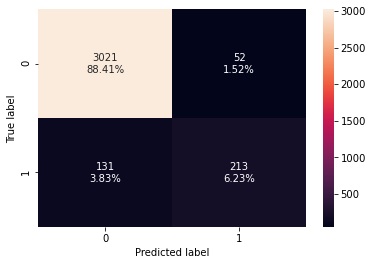

In [696]:
# creating confusion matrix
my_confusion_matrix_sklearn_with_threshold(lg, X_train, y_train)

In [697]:
log_reg_model_train_perf = my_model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.946444  0.619186   0.803774  0.699507

#### Checking performance on test set

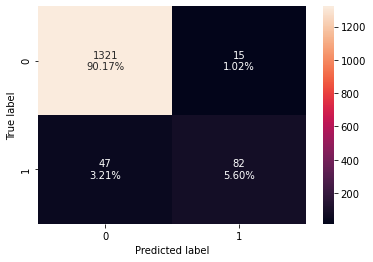

In [698]:
# creating confusion matrix
my_confusion_matrix_sklearn_with_threshold(lg, X_test, y_test)

In [699]:
log_reg_model_test_perf = my_model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


Accuracy    Recall  Precision        F1
0  0.957679  0.635659   0.845361  0.725664

#### ROC-AUC

* ROC-AUC on training set

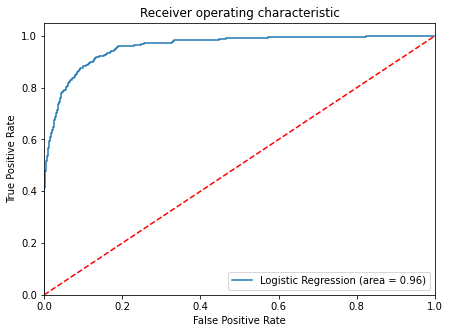

In [700]:
logit_roc_auc_train = roc_auc_score(y_train, lg.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

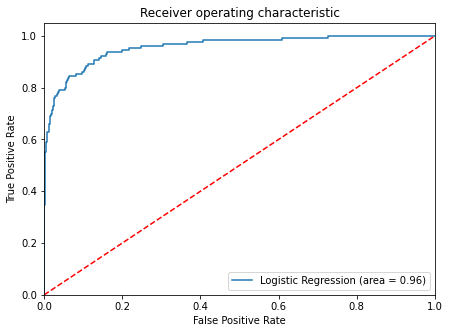

In [701]:
logit_roc_auc_test = roc_auc_score(y_test, lg.predict_proba(X_test)[:, 1])
fpr, tpr, thresholds = roc_curve(y_test, lg.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [702]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg.predict_proba(X_train)[:, 1])

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.0831305875098854


#### Checking model performance on training set

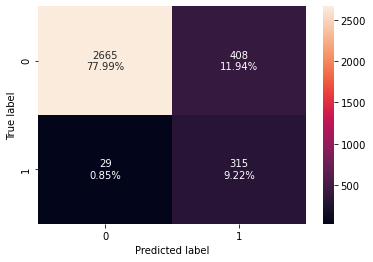

In [703]:
# creating confusion matrix
my_confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [704]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = my_model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy    Recall  Precision       F1
0   0.87211  0.915698   0.435685  0.59044

#### Checking model performance on test set

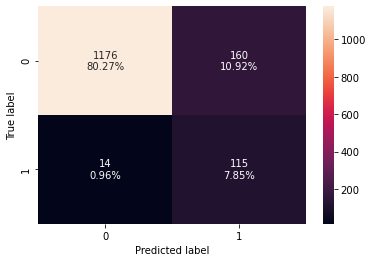

In [705]:
# creating confusion matrix
my_confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [706]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = my_model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


Accuracy    Recall  Precision        F1
0  0.881229  0.891473   0.418182  0.569307

* The precision and F1 of the model for both training and test set has reduced.

#### Let's use Precision-Recall curve and see if we can find a better threshold

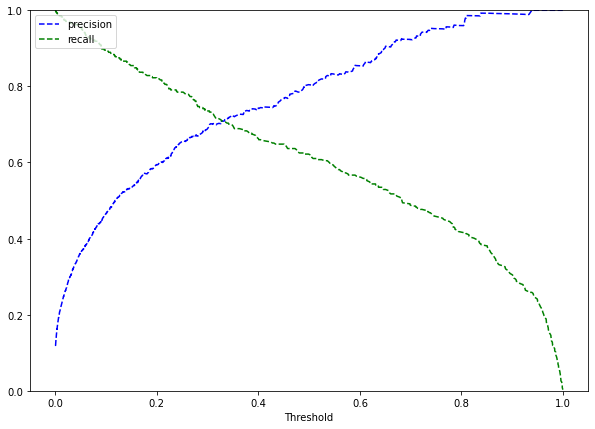

In [707]:
y_scores = lg.predict_proba(X_train)[:, 1]
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.38, we get balanced recall and precision.

In [708]:
# setting the threshold
optimal_threshold_curve = 0.38

#### Checking model performance on training set

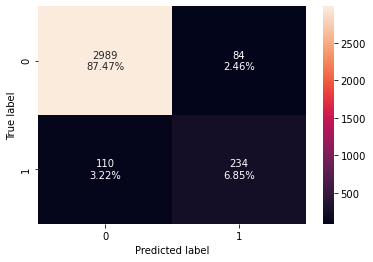

In [709]:
# creating confusion matrix
my_confusion_matrix_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)

In [710]:
log_reg_model_train_perf_threshold_curve = my_model_performance_classification_sklearn_with_threshold(
    lg, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.943225  0.680233   0.735849  0.706949

#### Checking model performance on test set

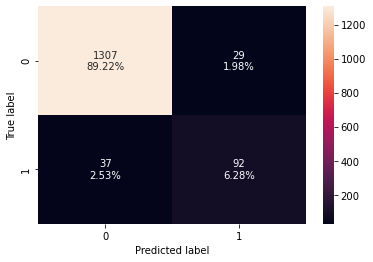

In [711]:
# creating confusion matrix
my_confusion_matrix_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)

In [712]:
log_reg_model_test_perf_threshold_curve = my_model_performance_classification_sklearn_with_threshold(
    lg, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


Accuracy    Recall  Precision     F1
0  0.954949  0.713178   0.760331  0.736

* Model is performing well on training and test.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.38 as the optimal threshold.

### Model Performance Summary

In [713]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.074 Threshold",
    "Logistic Regression-0.38 Threshold"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression sklearn  Logistic Regression-0.074 Threshold  \
Accuracy                      0.946444                             0.872110   
Recall                        0.619186                             0.915698   
Precision                     0.803774                             0.435685   
F1                            0.699507                             0.590440   

           Logistic Regression-0.38 Threshold  
Accuracy                             0.943225  
Recall                               0.680233  
Precision                            0.735849  
F1                                   0.706949

* Model is performing better at the default threshold on the training data set

In [714]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T
        ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.074 Threshold",
    "Logistic Regression-0.38 Threshold"
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression sklearn  Logistic Regression-0.074 Threshold  \
Accuracy                      0.957679                             0.881229   
Recall                        0.635659                             0.891473   
Precision                     0.845361                             0.418182   
F1                            0.725664                             0.569307   

           Logistic Regression-0.38 Threshold  
Accuracy                             0.954949  
Recall                               0.713178  
Precision                            0.760331  
F1                                   0.736000

* Model is performing better at the default threshold on the test data set

In [715]:
def get_my_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [716]:
def my_confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Build Decision Tree Model

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 10% and the frequency of class B is 90%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.15,1:0.85} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [717]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight={0: 0.15, 1: 0.85}, random_state=1
)

In [718]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### Checking model performance on training set

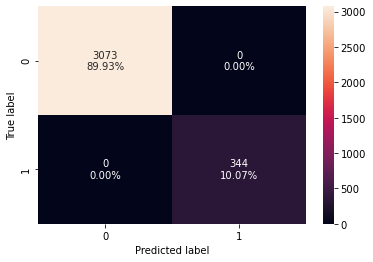

In [719]:
my_confusion_matrix_sklearn(model, X_train, y_train)

In [720]:
decision_tree_perf_train = get_my_recall_score(model, X_train, y_train)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

#### Checking model performance on test set

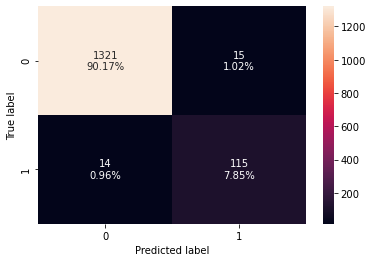

In [721]:
my_confusion_matrix_sklearn(model, X_test, y_test)

In [722]:
decision_tree_perf_test = get_my_recall_score(model, X_test, y_test)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.8914728682170543


* There is a minimal disparity in performance of model on training set and test set, which suggests that the model is minimally overfiiting.

## Visualizing the Decision Tree

In [723]:
## creating a list of column names
my_feature_names = X_train.columns.to_list()

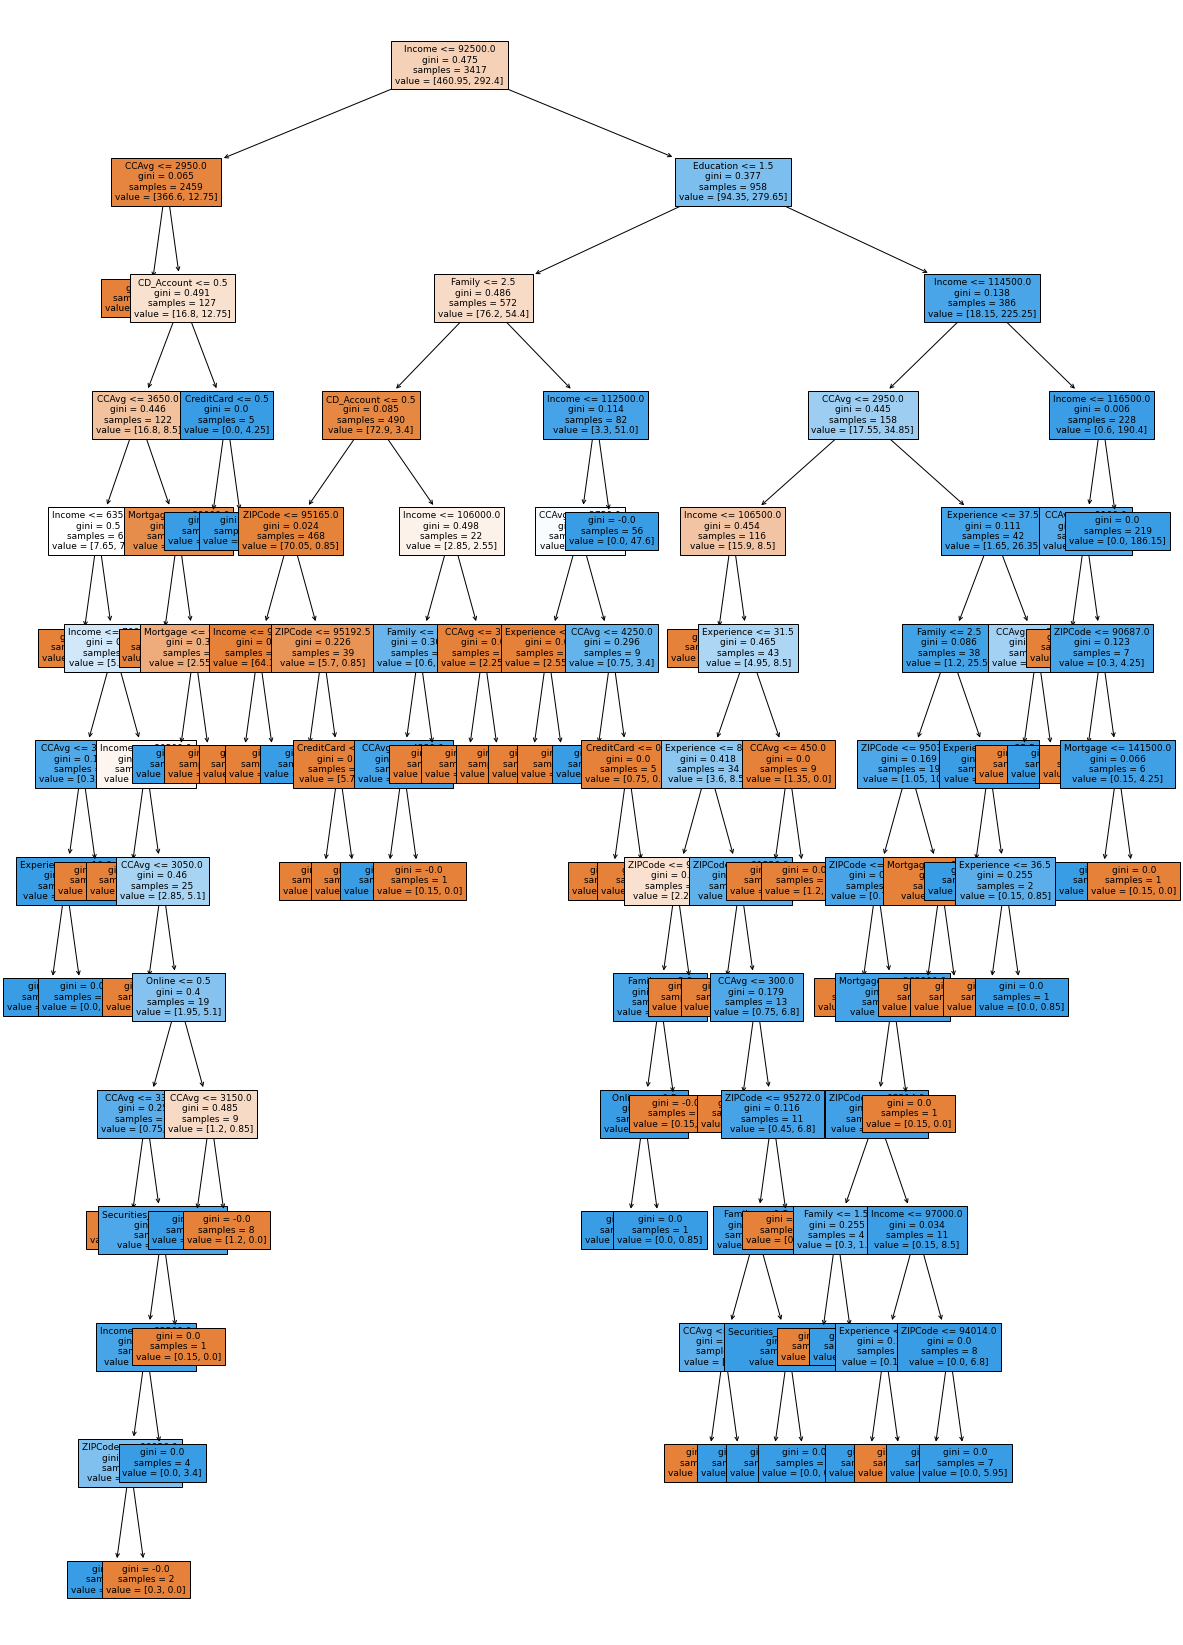

In [724]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=my_feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [725]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=my_feature_names, show_weights=True))

|--- Income <= 92500.00
|   |--- CCAvg <= 2950.00
|   |   |--- weights: [349.80, 0.00] class: 0
|   |--- CCAvg >  2950.00
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3650.00
|   |   |   |   |--- Income <= 63500.00
|   |   |   |   |   |--- weights: [1.80, 0.00] class: 0
|   |   |   |   |--- Income >  63500.00
|   |   |   |   |   |--- Income <= 70000.00
|   |   |   |   |   |   |--- CCAvg <= 3150.00
|   |   |   |   |   |   |   |--- Experience <= 10.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.85] class: 1
|   |   |   |   |   |   |   |--- Experience >  10.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.70] class: 1
|   |   |   |   |   |   |--- CCAvg >  3150.00
|   |   |   |   |   |   |   |--- weights: [0.30, 0.00] class: 0
|   |   |   |   |   |--- Income >  70000.00
|   |   |   |   |   |   |--- Income <= 80500.00
|   |   |   |   |   |   |   |--- weights: [2.70, 0.00] class: 0
|   |   |   |   |   |   |--- Income >  80500.00
|   |   |   |   |   |   |   |-

* The tree above is very complex and difficult to interpret.

In [726]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income              5.987987e-01
Family              1.464819e-01
Education           1.230296e-01
CCAvg               8.369230e-02
ZIPCode             1.691884e-02
CD_Account          1.490869e-02
Experience          8.006092e-03
Mortgage            5.915363e-03
Online              1.540313e-03
Securities_Account  7.081503e-04
CreditCard          6.196178e-17


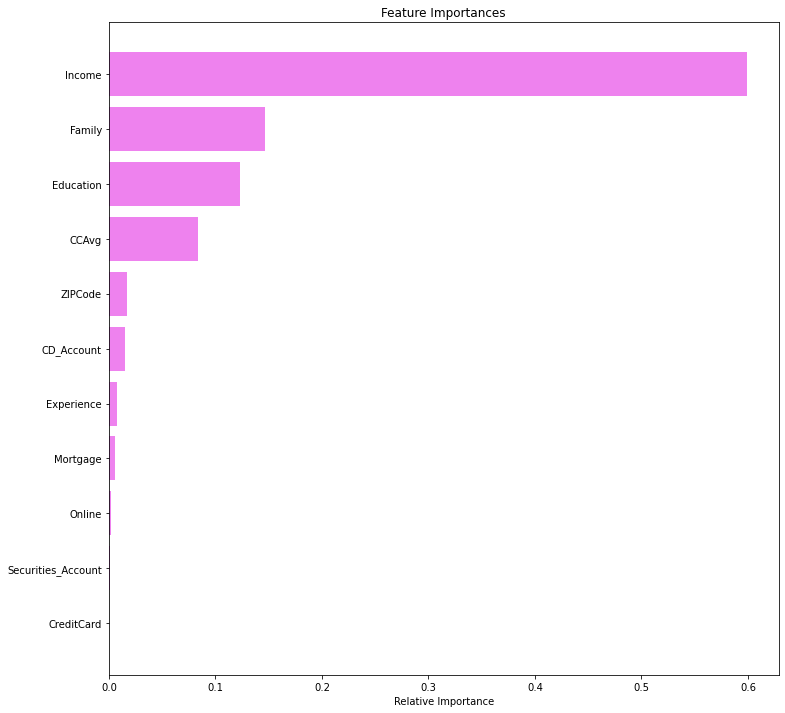

In [727]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [my_feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Income is the most important variable for predicting the Loan purchasing.

### Reducing over fitting

#### Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [728]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, criterion='entropy',
                       max_depth=5, min_impurity_decrease=1e-05,
                       random_state=1)

#### Checking performance on training set


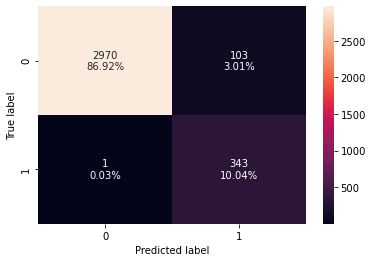

In [729]:
my_confusion_matrix_sklearn(estimator, X_train, y_train)

In [730]:
decision_tree_tune_perf_train = get_my_recall_score(estimator, X_train, y_train)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.997093023255814


#### Checking performance on test set

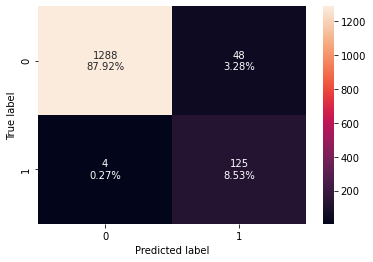

In [731]:
my_confusion_matrix_sklearn(estimator, X_test, y_test)

In [732]:
decision_tree_tune_perf_test = get_my_recall_score(estimator, X_test, y_test)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.9689922480620154


* The model is giving a generalized result now.

## Visualizing the Decision Tree

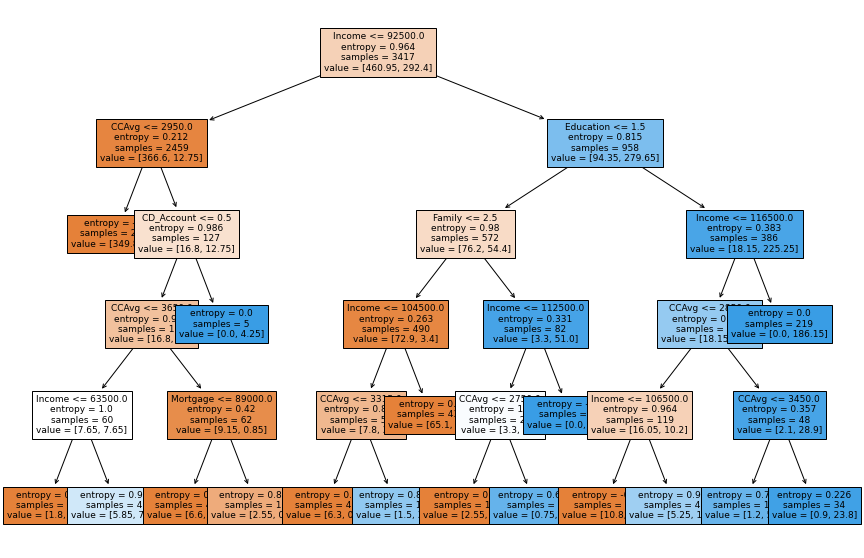

In [733]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=my_feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [734]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=my_feature_names, show_weights=True))

|--- Income <= 92500.00
|   |--- CCAvg <= 2950.00
|   |   |--- weights: [349.80, 0.00] class: 0
|   |--- CCAvg >  2950.00
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3650.00
|   |   |   |   |--- Income <= 63500.00
|   |   |   |   |   |--- weights: [1.80, 0.00] class: 0
|   |   |   |   |--- Income >  63500.00
|   |   |   |   |   |--- weights: [5.85, 7.65] class: 1
|   |   |   |--- CCAvg >  3650.00
|   |   |   |   |--- Mortgage <= 89000.00
|   |   |   |   |   |--- weights: [6.60, 0.00] class: 0
|   |   |   |   |--- Mortgage >  89000.00
|   |   |   |   |   |--- weights: [2.55, 0.85] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 4.25] class: 1
|--- Income >  92500.00
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 104500.00
|   |   |   |   |--- CCAvg <= 3315.00
|   |   |   |   |   |--- weights: [6.30, 0.00] class: 0
|   |   |   |   |--- CCAvg >  3315.00
|   |   |   |   |   |--- weights: [1.50, 3.40] class: 1
|   | 

In [735]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

# Here we will see that importance of features has increased

                         Imp
Income              0.614140
Family              0.132617
Education           0.123289
CCAvg               0.119212
CD_Account          0.008623
Mortgage            0.002119
Experience          0.000000
ZIPCode             0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


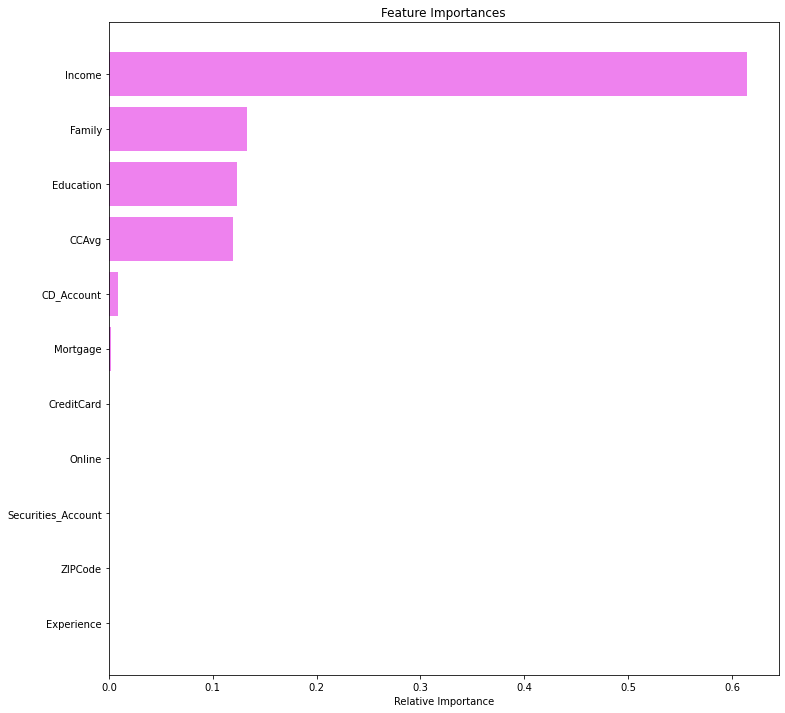

In [736]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [my_feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* In tuned decision tree Income_log is the most important feature followed by Family.

## Cost Complexity Pruning


The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

Total impurity of leaves vs effective alphas of pruned tree
---------------------------------------------------------------
Minimal cost complexity pruning recursively finds the node with the "weakest
link". The weakest link is characterized by an effective alpha, where the
nodes with the smallest effective alpha are pruned first. To get an idea of
what values of ``ccp_alpha`` could be appropriate, scikit-learn provides
`DecisionTreeClassifier.cost_complexity_pruning_path` that returns the
effective alphas and the corresponding total leaf impurities at each step of
the pruning process. As alpha increases, more of the tree is pruned, which
increases the total impurity of its leaves.

In [737]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.15, 1: 0.85})
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [738]:
pd.DataFrame(path)

ccp_alphas    impurities
0   0.000000e+00 -6.487315e-15
1   7.515945e-19 -6.486563e-15
2   7.515945e-19 -6.485811e-15
3   9.947575e-19 -6.484817e-15
4   1.215815e-18 -6.483601e-15
5   1.768458e-18 -6.481832e-15
6   3.006378e-18 -6.478826e-15
7   3.006378e-18 -6.475820e-15
8   3.581127e-18 -6.472238e-15
9   5.040105e-18 -6.467198e-15
10  1.052232e-17 -6.456676e-15
11  2.317416e-17 -6.433502e-15
12  1.138003e-16 -6.319702e-15
13  1.956579e-04  3.913157e-04
14  1.971775e-04  7.856708e-04
15  3.600937e-04  1.865952e-03
16  3.658534e-04  3.329365e-03
17  3.659331e-04  3.695298e-03
18  3.719649e-04  4.439228e-03
19  3.735041e-04  5.559741e-03
20  3.760979e-04  5.935839e-03
21  3.967526e-04  6.729344e-03
22  4.219757e-04  7.573295e-03
23  5.398559e-04  8.653007e-03
24  6.121593e-04  9.265166e-03
25  6.728021e-04  9.937968e-03
26  7.126065e-04  1.065057e-02
27  9.133806e-04  1.156396e-02
28  1.026267e-03  1.361649e-02
29  1.032389e-03  1.568127e-02
30  1.108817e-03  1.679008e-02
31  1.114767e-03  1.901962e-02
32  1.197010e-03  2.021663e-02
33  1.529415e-03  2.480487e-02
34  1.631268e-03  2.643614e-02
35  1.649552e-03  3.138479e-02
36  2.283451e-03  3.366825e-02
37  2.765033e-03  3.643328e-02
38  2.814546e-03  3.924782e-02
39  2.821663e-03  4.206949e-02
40  3.782626e-03  4.585211e-02
41  4.259540e-03  5.011165e-02
42  6.399898e-03  5.651155e-02
43  1.208835e-02  8.068826e-02
44  1.346715e-02  9.415542e-02
45  6.292367e-02  2.200028e-01
46  2.549688e-01  4.749716e-01

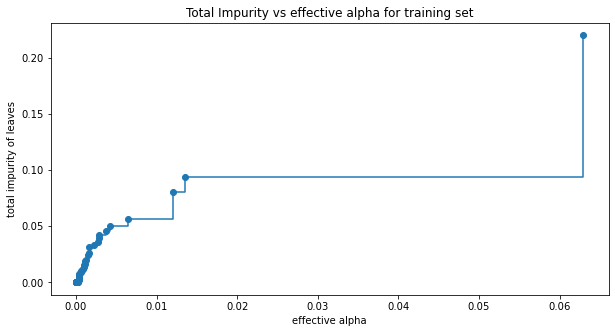

In [739]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [740]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2549687926033617


For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

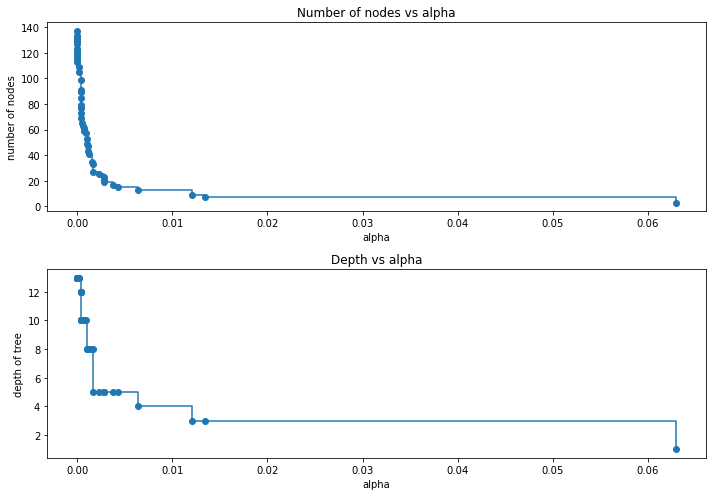

In [741]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [742]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [743]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [744]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

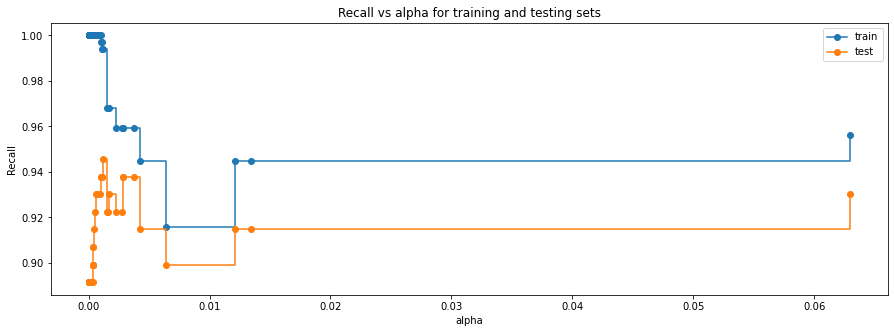

In [745]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**Maximum value of Recall is at 0.06 alpha, but if we choose decision tree will only have a root node and we would lose the buisness rules, instead we can choose alpha 0.015 retaining information and getting higher recall.**

In [746]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0011970098343571116,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)


In [747]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0011970098343571116,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

#### checking performance on training set

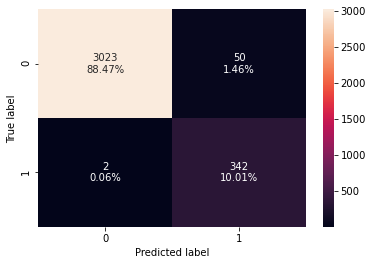

In [748]:
my_confusion_matrix_sklearn(best_model, X_train, y_train)

In [749]:
print("Recall Score:", get_my_recall_score(best_model, X_train, y_train))

Recall Score: 0.9941860465116279


#### checking performance on test set

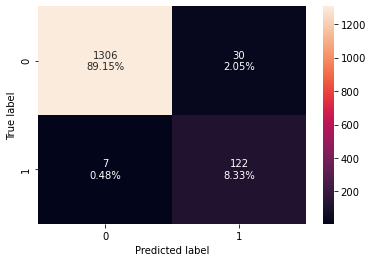

In [750]:
my_confusion_matrix_sklearn(best_model, X_test, y_test)

In [751]:
print("Recall Score:", get_my_recall_score(best_model, X_test, y_test))

Recall Score: 0.9457364341085271


### Visualizing the Decision Tree

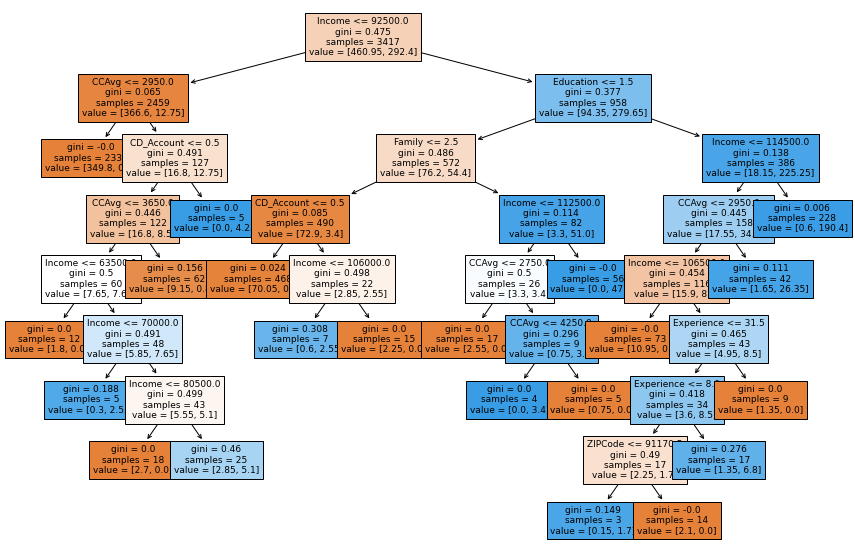

In [752]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model,
    feature_names=my_feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

**Creating model with 0.002 ccp_alpha**

In [753]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

#### Checking performance on the training set

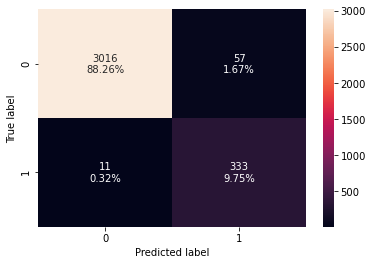

In [754]:
my_confusion_matrix_sklearn(best_model2, X_train, y_train)

In [755]:
decision_tree_postpruned_perf_train = get_my_recall_score(best_model2, X_train, y_train)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9680232558139535


#### Checking performance on the test set

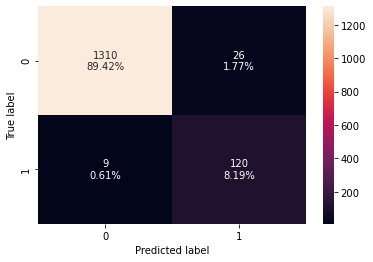

In [756]:
my_confusion_matrix_sklearn(best_model2, X_test, y_test)

In [757]:
decision_tree_postpruned_perf_test = get_my_recall_score(best_model2, X_test, y_test)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9302325581395349


### Visualizing the Decision Tree

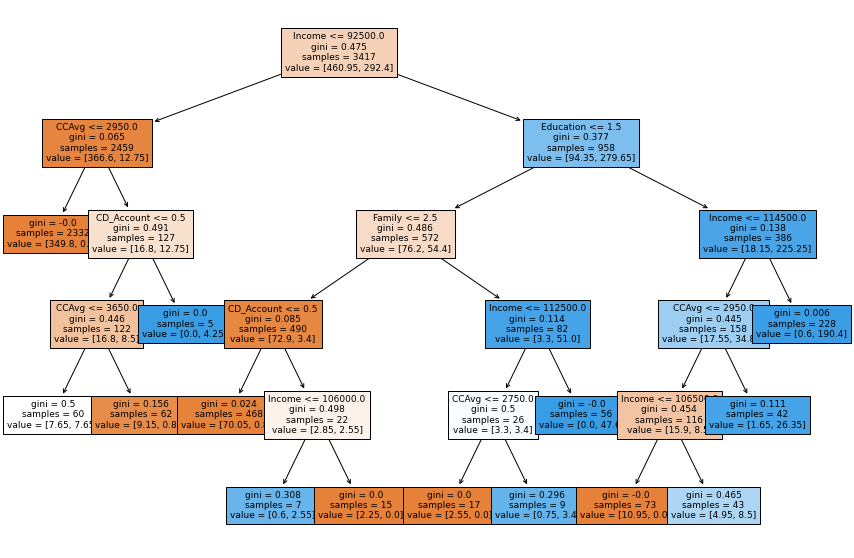

In [758]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=my_feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [759]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model2, feature_names=my_feature_names, show_weights=True))

|--- Income <= 92500.00
|   |--- CCAvg <= 2950.00
|   |   |--- weights: [349.80, 0.00] class: 0
|   |--- CCAvg >  2950.00
|   |   |--- CD_Account <= 0.50
|   |   |   |--- CCAvg <= 3650.00
|   |   |   |   |--- weights: [7.65, 7.65] class: 0
|   |   |   |--- CCAvg >  3650.00
|   |   |   |   |--- weights: [9.15, 0.85] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [0.00, 4.25] class: 1
|--- Income >  92500.00
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- weights: [70.05, 0.85] class: 0
|   |   |   |--- CD_Account >  0.50
|   |   |   |   |--- Income <= 106000.00
|   |   |   |   |   |--- weights: [0.60, 2.55] class: 1
|   |   |   |   |--- Income >  106000.00
|   |   |   |   |   |--- weights: [2.25, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 112500.00
|   |   |   |   |--- CCAvg <= 2750.00
|   |   |   |   |   |--- weights: [2.55, 0.00] class: 0
|   |   |   |   |--- CCAvg >  2750.00

In [760]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.629981
Family              0.151970
Education           0.131734
CCAvg               0.070351
CD_Account          0.015964
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


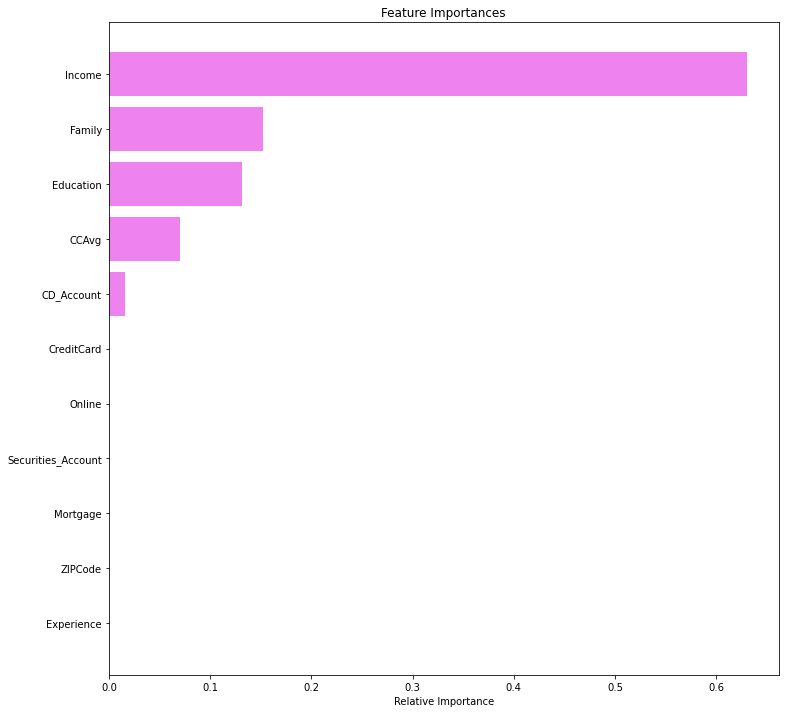

In [761]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [my_feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Comparing all the decision tree models

In [762]:
# training performance comparison

models_train_comp_df = pd.DataFrame(
    [
        decision_tree_perf_train,
        decision_tree_tune_perf_train,
        decision_tree_postpruned_perf_train,
    ],
    columns=["Recall on training set"],
)

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Recall on training set
0                1.000000
1                0.997093
2                0.968023

In [763]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.891473
1               0.968992
2               0.930233

* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.

### Conclusion

- We have been able to build a predictive model that can be used by the bank to check who are all the customers might buy personal loan with f1_score of of 0.59 on the training set and formulate policies accordingly
* Coefficient of Securities_Account, Online, CreditCard are negative, increase in these will lead to decrease in chances of a approving loan to a customer. 
* Coefficient all the levels of Experience,Family,Education,CD_Account,CCAvg_log,Income_log native country positive increase in these will lead to increase in chances of a approving loan to the customer.
- We analyzed the "AllLife bank-potential customers" using different techniques and used Decision Tree Classifier to build a predictive model for the same.
- The model built can be used to predict if a customer is going to purchase persoanl loan or not
- We visualized different trees and their confusion matrix to get a better understanding of the model. Easy interpretation is one of the key benefits of Decision Trees.
- We verified the fact that how much less data preparation is needed for Decision Trees and such a simple model gave good results even with outliers and imbalanced classes which shows the robustness of Decision Trees.
- Income, Family, and Education are the most important variable in predicting the customers that will purchase the loan. 
- We established the importance of hyper-parameters/ pruning to reduce overfitting.

### Recommendations

- The AllLife bank should promote the personal loan for the customer(s) who has highest Income level and family size 
- Income is one of the significant predictors of Personal_Loan, Bank should spend more money in the marketing where high income people resides
- Customer who likely purchase loan will have family and bank should come up with more schemes for customers who has family and they are likely to personal loan in future

* According to the decision tree model - 

    a) If a customer income is less than 92500.00, there is high chance that might not purhase the personal loan

    b) If a customer income is greater than 92500.00 there is high chance that they may purchase the personal loan


* It is observed that the more the income and family size that the customer is likely to purchase the personal loan from the bank. 

* Customer retention - Member Loyalty programs initiatives like special discounts in loans, high interesets for CD, etc can be provided.